# Time Series Forecasting

In [73]:
# Importing the required packages
import pandas as pd
import numpy as np
np.random.seed(sum(map(ord, 'calmap')))
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
import calmap

In [74]:
# Reading the data
train = pd.read_csv("C:\\Users\\jnet\\Documents\\mounika\\time series\\Train.csv")
test= pd.read_csv("C:\\Users\\jnet\\Documents\\mounika\\time series\\Test.csv")
submit = pd.read_csv("C:\\Users\\jnet\\Documents\\mounika\\time series\\Sample Submission.csv")
test_data=test.copy()

In [75]:
# Data types of the Train data
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [76]:
# Data types of the Test data
test.dtypes

ID           int64
Datetime    object
dtype: object

In [77]:
# Shape of the Train data
train.shape

(18288, 3)

In [78]:
# Shape of the Test data
test.shape

(5112, 2)

In [79]:
# First five records from Train data
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [80]:
# Last five Records from Train data
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [81]:
# First five records from Test data
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [82]:
# Last five records from Test data
test.tail()

,ID,Datetime
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00
5111,23399,26-04-2015 23:00


In [83]:
# we are not using the ID column for forecasting the data so we are droping the ID column
train_data=train.drop(['ID'],axis=1)

In [84]:
# After dropping the ID column First five records from Train data
train_data.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [85]:
# Coverting the Datetime column to index 
train_data.set_index('Datetime', inplace = True)
test.set_index('Datetime', inplace = True)

In [86]:
# After converting the Datetime column to index First five records from Train data
train_data.head()

,Count
Datetime,
25-08-2012 00:00,8
25-08-2012 01:00,2
25-08-2012 02:00,6
25-08-2012 03:00,2
25-08-2012 04:00,2


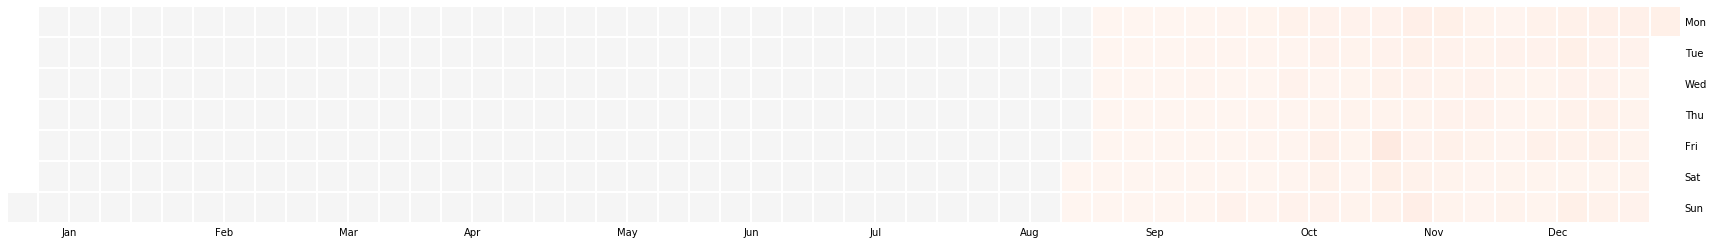

In [93]:
calmap.yearplot(train_data['Count'],year=2012)

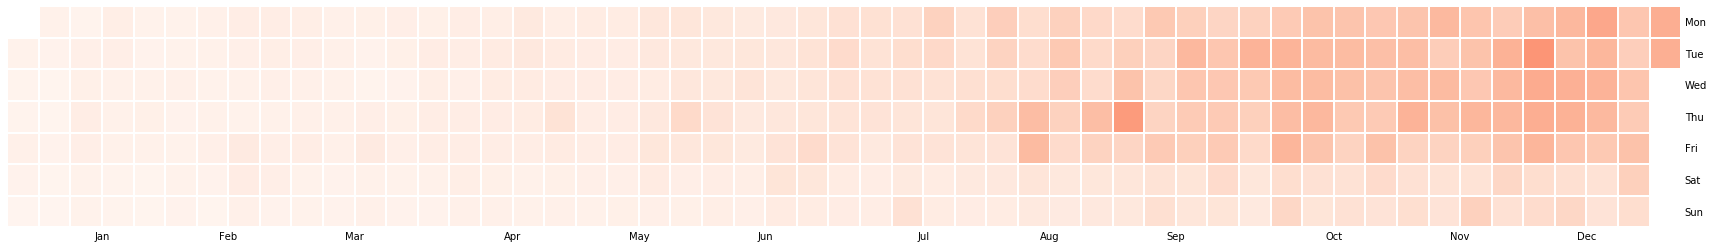

In [94]:
calmap.yearplot(train_data['Count'],year=2013)

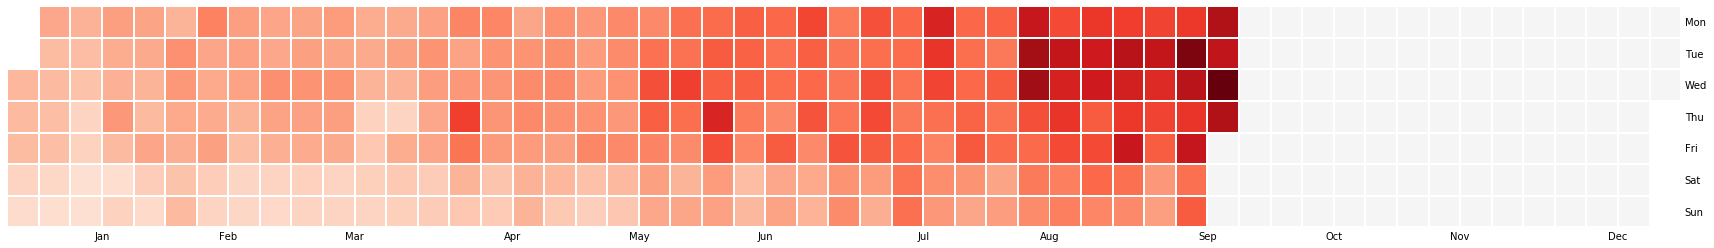

In [95]:
calmap.yearplot(train_data['Count'],year=2014)

(<Figure size 864x576 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021442ABE0F0>,
       dtype=object))

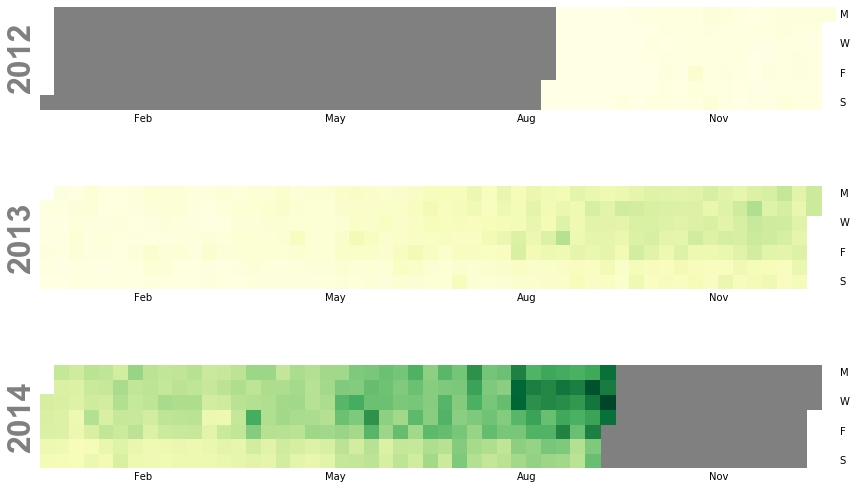

In [97]:
calmap.calendarplot(train_data['Count'], monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(12, 8)))


In [88]:
#parsing the datetime data 
dataparse = lambda dates: pd.datetime.strptime(dates, "%d-%m-%Y %H:%M")
train_data.index = train_data.index.map(dataparse)
test.index = test.index.map(dataparse)
train_data.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2



# Stationarity Checking
       
        *  The observations in a stationary time series are not dependent on time.Time series are stationary if they do not have trend or seasonal effects.Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
          
        *  When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.
          
        *  Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.
          
        *  Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.
          
        *  There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

        *  Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
        *  Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for  obvious or significant differences.
        *  Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.
        
        *  We use two methods under summary statistics to check the stationarity is:
                 1) mean, standard deviation
                 2) Augumented Dickey-Fuller test
         
         * The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
         The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

         * Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
         
         * Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
          
         * p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
         
         * p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 
          
          



    

In [17]:
from statsmodels.tsa.stattools import adfuller
def testing_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

   

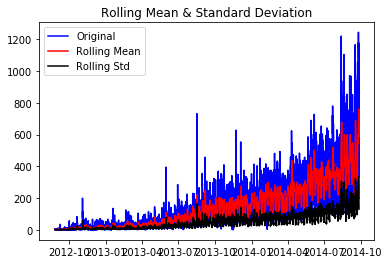

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [18]:
testing_stationarity(train_data['Count'])

#   Trend removing¶

         * Evethough the Statistic Test show that the data is stationary ( Test Statistic < Critical Values), we still can see an increasing trend in the data. Therefore, we will try to make the data more stationary firstly. We need to remove two properties from the data: trend and seasonality.
         * Trend: data varying mean over time. For example: the number of the value can increase or decrease over time. Estimating and Eliminating Trend techniques: Transformation: for example, for increasing trend, we can apply transformation which penalizes higher values more than smaller ones. For example: log, square roor,... Some ways to estimate and remove the trend:
          Aggregation: taking average of time period lik monthly/weekly
          Smoothing: taking rolling average
          Polynomial fitting: fit a regression model           

In [19]:
# Converting the Train data values into logorithmeic values
Log_train_data = np.log(train_data['Count'])
Log_train_data.head()

Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    0.693147
2012-08-25 02:00:00    1.791759
2012-08-25 03:00:00    0.693147
2012-08-25 04:00:00    0.693147
Name: Count, dtype: float64

Datetime
2012-08-25 00:00:00   NaN
2012-08-25 01:00:00   NaN
2012-08-25 02:00:00   NaN
2012-08-25 03:00:00   NaN
2012-08-25 04:00:00   NaN
Name: Count, dtype: float64

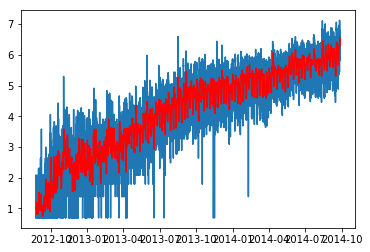

In [20]:
# Moving Average
moving_avg = Log_train_data.rolling(24).mean()
plt.plot(Log_train_data)
plt.plot(moving_avg, color = 'red')
moving_avg.head()

In [21]:
# Removing the increasing trend 
Log_train_data_moving_avg_diff = Log_train_data - moving_avg


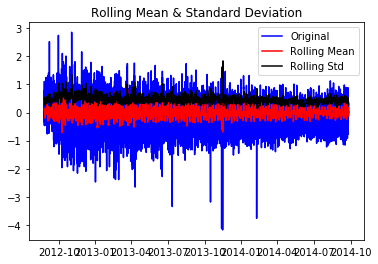

Results of Dickey-Fuller Test:
Test Statistic                   -21.316940
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18219.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861699
Critical Value (10%)              -2.566854
dtype: float64


In [22]:
# Since we are taking the average of 24 values, rolling mean is not defined for the first 23 values. (NaN)
Log_train_data_moving_avg_diff.dropna(inplace = True)
testing_stationarity(Log_train_data_moving_avg_diff)

Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    1.376286
2012-08-25 02:00:00    1.518795
2012-08-25 03:00:00    1.303357
2012-08-25 04:00:00    1.174166
Name: Count, dtype: float64

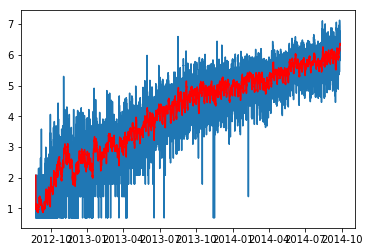

In [23]:
#Exponentially weighted moving average DATA FROM PANDAS SHOULD ADD HERE
exp_wgt_avg = Log_train_data.ewm(halflife=24).mean()
plt.plot(Log_train_data)
plt.plot(exp_wgt_avg, color='red')
exp_wgt_avg.head()

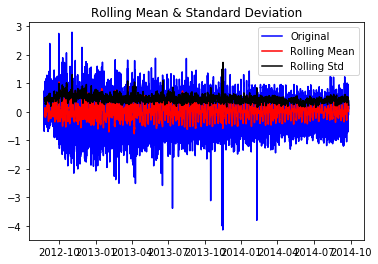

Results of Dickey-Fuller Test:
Test Statistic                   -19.237928
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [24]:
#removing the trend of increasing
Log_train_data_exp_wgt_avg_diff = Log_train_data - exp_wgt_avg
testing_stationarity(Log_train_data_exp_wgt_avg_diff)

# Seasonality remove¶

         * Seasonality: variations at specific time-frames. E.g: people have tendency to buy jacket in winters To remove the seasonality, we have two techniques:
         
         * Differencing: taking the difference with a particular time lag

         * Decomposition: modeling both trend and seasonality and removing them from the model

In [25]:
Log_train_data.head()

Datetime
2012-08-25 00:00:00    2.079442
2012-08-25 01:00:00    0.693147
2012-08-25 02:00:00    1.791759
2012-08-25 03:00:00    0.693147
2012-08-25 04:00:00    0.693147
Name: Count, dtype: float64

# Differencing

        * Usually, non-stationary series can be corrected by just differencing.The idea behind differencing is that, if the original data series does not have constant properties over time, then the change from one period to another might.

In [26]:
Log_train_data.shift().head()

Datetime
2012-08-25 00:00:00         NaN
2012-08-25 01:00:00    2.079442
2012-08-25 02:00:00    0.693147
2012-08-25 03:00:00    1.791759
2012-08-25 04:00:00    0.693147
Name: Count, dtype: float64

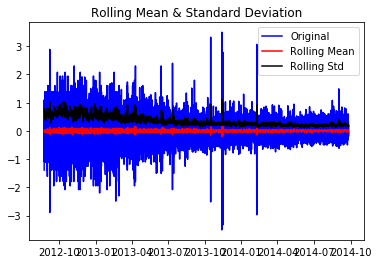

Results of Dickey-Fuller Test:
Test Statistic                   -32.041628
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18241.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [27]:
Log_train_data_diff = Log_train_data - Log_train_data.shift()
Log_train_data_diff = Log_train_data_diff.dropna()
testing_stationarity(Log_train_data_diff)

# Decomposition
        In decomposition, trend and seasonality are treated separatedly. Let's recall the definitions: 

        * Trend: The increasing or decreasing value in the series.
        * Seasonality: The repeating short-term cycle in the series.
        * Residual: The random variation in the series.

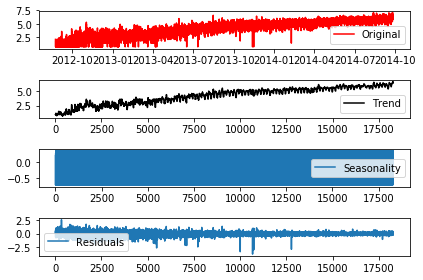

In [28]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(pd.DataFrame(Log_train_data).Count.values, freq = 24)

Trend = decompostion.trend
Seasonal = decompostion.seasonal
Residual = decompostion.resid




plt.subplot(411)
plt.plot(Log_train_data, label='Original', color = 'red')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(Trend, label='Trend',color = 'black')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(Seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(Residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

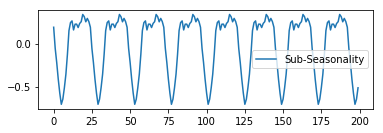

In [29]:
#A closer look at the seasonality
plt.subplot(211)
plt.plot(Seasonal[:200],label='Sub-Seasonality')
plt.legend(loc='best')


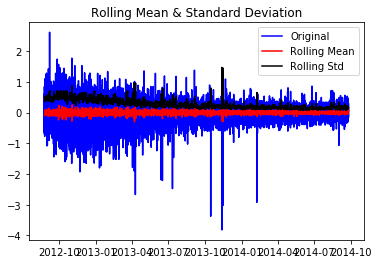

Results of Dickey-Fuller Test:
Test Statistic                   -32.205683
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    18218.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861699
Critical Value (10%)              -2.566854
dtype: float64


In [30]:
train_log_decompose = pd.DataFrame(Residual)
train_log_decompose['date'] = Log_train_data.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
testing_stationarity(train_log_decompose[0])

# Forecast a Time Series
* To fit and predict a time series, we use ARIMA, which stands for auto-regressive integrated moving average and is specified by these three order parameters: (p, d, q). 

* Auto regressive (AR(p)): referring to the use of past values in the regression equation for the series Y. p specifies the number of lags used in the model. For instance if p is 2, the predictors for x(t) will be x(t-1)x(t-2). AR(2) or, equivalently, ARIMA(2,0,0), is represented as

* Moving average (MA(q)): representing the error of the model as a combination of previous error terms et. q determines the number of terms to include in the model. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

* d represents the degree of differencing in the integrated (I(d)) component. For example, when d = 1 and d = 2:

* To get p,q values we use ACF and PACF plots

* Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

* Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In [31]:
# Forecast a Time Series
from statsmodels.tsa.stattools import acf, pacf
Lag_acf = acf(Log_train_data_diff, nlags = 25)
lag_pacf = pacf(Log_train_data_diff, nlags = 25, method = 'ols')

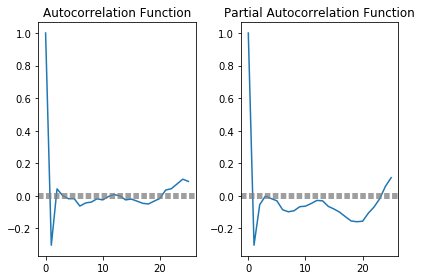

In [32]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(Lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Log_train_data_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Log_train_data_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Log_train_data_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Log_train_data_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


#  AR MODEL

In [33]:
# AR Model

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Log_train_data, order = (1,1,0))
results_model = model.fit(disp = -1)
fitted_values = results_model.fittedvalues

C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\jnet\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\jnet\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be int

In [34]:
print(results_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                18287
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -8517.699
Method:                       css-mle   S.D. of innovations              0.386
Date:                Fri, 26 Apr 2019   AIC                          17041.398
Time:                        17:12:02   BIC                          17064.840
Sample:                    08-25-2012   HQIC                         17049.101
                         - 09-25-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.002      0.113      0.910      -0.004       0.005
ar.L1.D.Count    -0.3027      0.007    -42.933      0.000      -0.317      -0.289
                                    Root

Text(0.5, 1.0, 'RSS: 2718.0936')

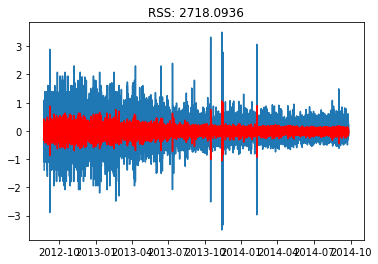

In [35]:
plt.plot(Log_train_data_diff)
plt.plot(fitted_values, color='red')
plt.title('RSS: %.4f'% sum((fitted_values-Log_train_data_diff)**2))

#  COMBINED MODEL

C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 2640.9693')

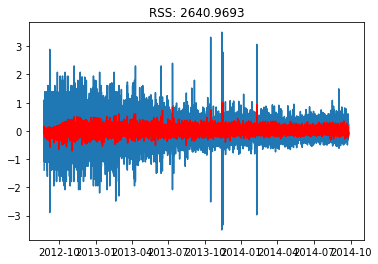

In [36]:
#combined model
model = ARIMA(Log_train_data, order=(1, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(Log_train_data_diff.dropna())
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-Log_train_data_diff)**2))

In [37]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                18287
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8252.724
Method:                       css-mle   S.D. of innovations              0.380
Date:                Fri, 26 Apr 2019   AIC                          16513.448
Time:                        17:12:20   BIC                          16544.704
Sample:                    08-25-2012   HQIC                         16523.719
                         - 09-25-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003   8.04e-05      3.503      0.000       0.000       0.000
ar.L1.D.Count     0.7525      0.005    141.422      0.000       0.742       0.763
ma.L1.D.Count    -0.9930      0.001   -7

# MA MODEL

In [38]:
# MA model 
model = ARIMA(Log_train_data.dropna(), order=(0, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Datetime
2012-08-25 01:00:00    0.000252
2012-08-25 02:00:00    0.390748
2012-08-25 03:00:00   -0.216281
2012-08-25 04:00:00    0.272171
2012-08-25 05:00:00    0.084189
dtype: float64


C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\jnet\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


# Taking it back to the original scale
Lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [39]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    return predict

In [40]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    


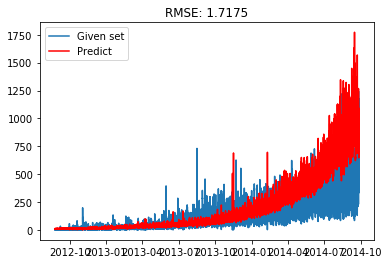

In [41]:
Predicted_arima  = check_prediction_diff(predictions_ARIMA_diff, train_data)

In [42]:
forecast_error = train_data['Count'] - Predicted_arima

In [43]:
mean_forecast_error = forecast_error.mean()
mean_forecast_error

-58.32699573312208

In [44]:
mean_absolute_error = abs(forecast_error).mean()
mean_absolute_error

107.17252134261906

In [45]:
mean_squared_error = (forecast_error*forecast_error).mean()
mean_squared_error

40359.731944727595

In [46]:
from math import sqrt 
rmse = sqrt(mean_squared_error)
rmse

200.89731691769205

In [47]:
L = [mean_forecast_error,mean_absolute_error,mean_squared_error,rmse]
metric = pd.DataFrame(L, {'mean_forecast_error','mean_absolute_error','mean_squared_error','rmse'})
metric.rename(columns = {0 :'metrics'}, inplace = True)
metric

,metrics
mean_squared_error,-58.326996
mean_absolute_error,107.172521
rmse,40359.731945
mean_forecast_error,200.897317


In [48]:
metric.to_csv("metric.csv",',')

In [49]:
test_predict_log = results_ARIMA.predict(exog = test, typ = 'levels')
print (test_predict_log.head())
print (test_predict_log.tail())

2012-08-25 01:00:00    2.079693
2012-08-25 02:00:00    1.083895
2012-08-25 03:00:00    1.575479
2012-08-25 04:00:00    0.965318
2012-08-25 05:00:00    0.777336
Freq: H, dtype: float64
2014-09-25 19:00:00    6.500307
2014-09-25 20:00:00    6.684438
2014-09-25 21:00:00    6.623376
2014-09-25 22:00:00    6.575603
2014-09-25 23:00:00    6.428843
Freq: H, dtype: float64


In [50]:
test_predict_log.shape

(18287,)

In [55]:
test_predicts = np.exp(test_predict_log)

In [59]:
TEST_PREDICTS = test_predicts.reset_index()

In [61]:
PREDICTS = TEST_PREDICTS[0]
PREDICTS.head()

0    8.002013
1    2.956172
2    4.833056
3    2.625622
4    2.175669
Name: 0, dtype: float64

In [62]:
# Predict values into Submission file
#submit['Datetime']=test_data['Datetime']
submit['Count']=PREDICTS
submit['ID']=test_data['ID']

In [63]:
submit.head()

,ID,Count
0,18288.0,8.002013
1,18289.0,2.956172
2,18290.0,4.833056
3,18291.0,2.625622
4,18292.0,2.175669


In [64]:
submit.to_csv('Submission_File2.csv')